In [91]:
import pandas as pd
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime

# df=quandl.get('WIKI/GOOGL') # Creating dataframe 
df=pd.read_csv('Project.csv',skiprows=1)
df=df[:-6]
df.tail()

df_dict=pd.read_csv('property_project.csv')
df_dict=df_dict[['address','lat','long']]
df_dict=df_dict.set_index('address').to_dict()
df_dict['lat']['JI XIANG COURT']

dates_dict={
    "Jan": 1,
    "Feb": 2,
    "Mar": 3,
    "Apr": 4,
    "May": 5,
    "Jun":6,
    "Jul":7,
    "Aug":8,
    "Sep":9,
    "Oct":10,
    "Nov":11,
    "Dec":12    
}

# Preprocessing
# -Converting Floor Area(1400 to 1500 -> 1450)
# -Monthly rental/ sqft> Monthly rental Psf
# -Building/Project Name , District -> lat, long
# -Lease Commencement Date -> date

def f(x):
    try:
        return sum([int(item) for item in str(x).split(' to ')])/2
    except:
        return 0
df['Floor Area (sq ft)'] = df['Floor Area (sq ft)'].apply(f)
df['Monthly Rent/ psf']=df['Monthly Gross Rent($)']/df['Floor Area (sq ft)']
df['lat']=df['Building/Project Name'].apply(lambda x:df_dict['lat'][x])
df['long']=df['Building/Project Name'].apply(lambda x:df_dict['long'][x])
def g(x):
    m,y=x.split('-')
    return pd.Timestamp(int(y),dates_dict[m],1).toordinal()
df['Lease Commencement Date']=df['Lease Commencement Date'].apply(g).astype(float)
# # Remove missing bedroom data
df['No. of Bedroom(for Non-Landed Only)']=df['No. of Bedroom(for Non-Landed Only)'].replace('na*',np.NaN)
df=df.dropna()
df = df.drop(df[df["Floor Area (sq ft)"]<50].index)

# # consolidaiton of Data
df=df[['Monthly Gross Rent($)','Monthly Rent/ psf','Postal District','lat','long','No. of Bedroom(for Non-Landed Only)','Floor Area (sq ft)','Lease Commencement Date']]
df['No. of Bedroom(for Non-Landed Only)']=df['No. of Bedroom(for Non-Landed Only)'].astype(float)
df['Floor Area (sq ft)']=df['Floor Area (sq ft)'].astype(float)

df=df.rename(index=str, columns={"Monthly Gross Rent($)": "monthly_gross_rent", "Monthly Rent/ psf": "monthly_rent_psf","Postal District":"district","lat": "lat","long": "long","No. of Bedroom(for Non-Landed Only)": "no_bedroom","Floor Area (sq ft)": "floor_area","Lease Commencement Date": "date" })
df.head(40)


,monthly_gross_rent,monthly_rent_psf,district,lat,long,no_bedroom,floor_area,date
0,3900.0,3.120000,5.0,1.32,103.820487,3.0,1250.0,736938.0
1,2600.0,3.466667,4.0,1.32,103.820487,2.0,750.0,736938.0
2,2650.0,3.533333,5.0,1.32,103.820487,1.0,750.0,736938.0
4,3200.0,4.923077,5.0,1.32,103.820487,1.0,650.0,736938.0
5,3400.0,2.720000,5.0,1.32,103.820487,3.0,1250.0,736938.0
6,4500.0,4.736842,2.0,1.32,103.820487,2.0,950.0,736938.0
7,3350.0,4.466667,1.0,1.32,103.820487,1.0,750.0,736938.0
8,2800.0,3.294118,5.0,1.32,103.820487,1.0,850.0,736938.0
9,3000.0,2.608696,3.0,1.32,103.820487,2.0,1150.0,736938.0
10,5800.0,5.043478,1.0,1.32,103.820487,2.0,1150.0,736938.0


In [95]:

X=np.array(df.drop(['monthly_gross_rent','monthly_rent_psf'],1))
Y=np.array(df['monthly_rent_psf'])
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2)
clf= LinearRegression()
clf.fit(X_train, y_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
accuracy=clf.score(X_test,y_test)
clf,accuracy

(24748, 6)
(6188, 6)
(24748,)
(6188,)


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 0.5053477918048626)

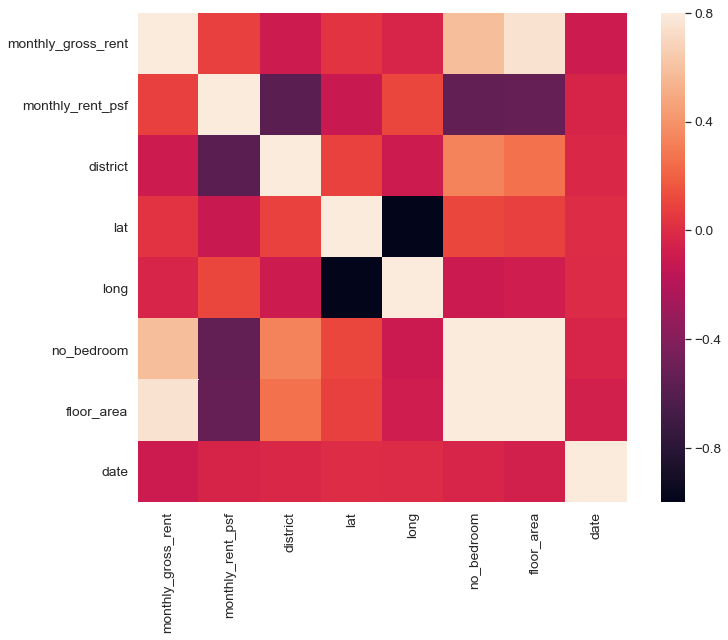

In [98]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation Matrix Heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

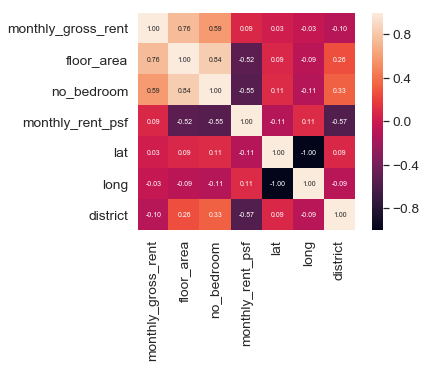

In [99]:
train=df
# Top 10 Heatmap
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'monthly_gross_rent')['monthly_gross_rent'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [100]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,monthly_gross_rent
1,floor_area
2,no_bedroom
3,monthly_rent_psf
4,lat
5,long
6,district


C:\Users\Kenny\Anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


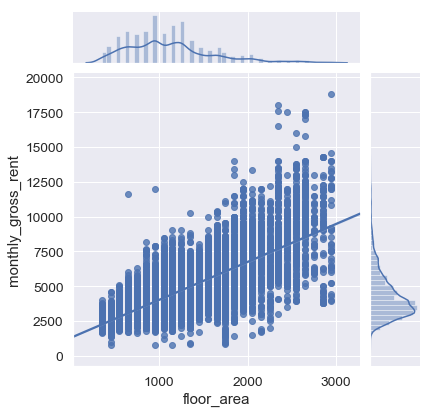

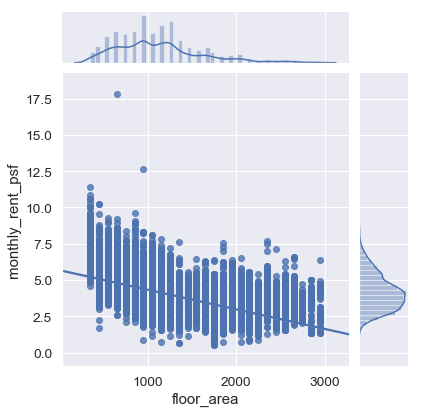

In [101]:
# Living Area vs Sale Price
# 'Monthly Gross Rent($)','Monthly Rent/ psf','lat','long','No. of Bedroom(for Non-Landed Only)','Floor Area (sq ft)','Lease Commencement Date'
sns.jointplot(x=train['floor_area'], y=train['monthly_gross_rent'], kind='reg')
sns.jointplot(x=train['floor_area'], y=train['monthly_rent_psf'], kind='reg')

C:\Users\Kenny\Anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Kenny\Anaconda2\envs\py36\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Kenny\Anaconda2\envs\py36\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Kenny\Anaconda2\envs\py36\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:513: RuntimeWarning: invalid value

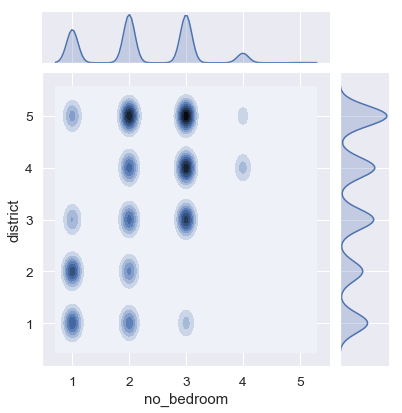

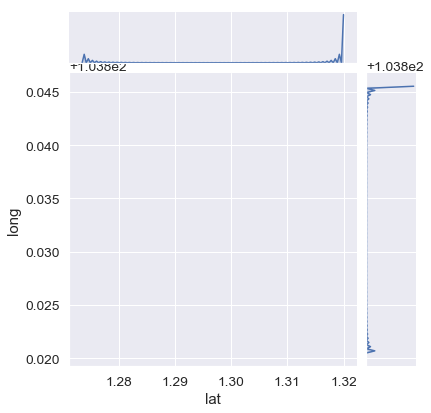

In [135]:
# Count of project being rented,
# Count of Bed Room
# 
bedroom_1=df[(df.no_bedroom>0.9)&(df.no_bedroom <1.1)]
bedroom_2=df[(df.no_bedroom>1.9)&(df.no_bedroom <2.1)]
bedroom_3=df[(df.no_bedroom>2.9)&(df.no_bedroom <3.1)]
bedroom_4=df[(df.no_bedroom>3.9)&(df.no_bedroom <4.1)]
bedroom_5=df[(df.no_bedroom>4.9)&(df.no_bedroom <5.1)]
# print(bedroom_1, bedroom_2,bedroom_3,bedroom_4,bedroom_5)

sns.jointplot(x=train['no_bedroom'], y=train['district'], kind='kde')
sns.jointplot(x=train['lat'], y=train['long'], kind='kde')


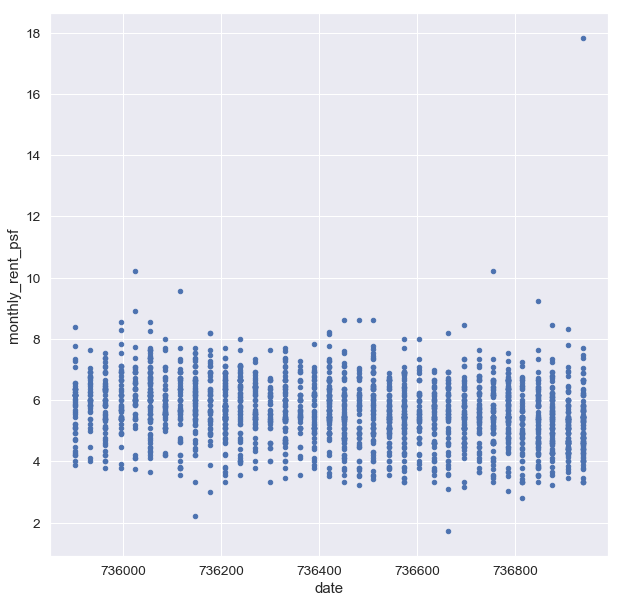

In [124]:

bedroom_1[(bedroom_1.district>0.9)&(bedroom_1.district<1.1)].plot(x='date',y=('monthly_rent_psf'),figsize=(10,10),kind='scatter')

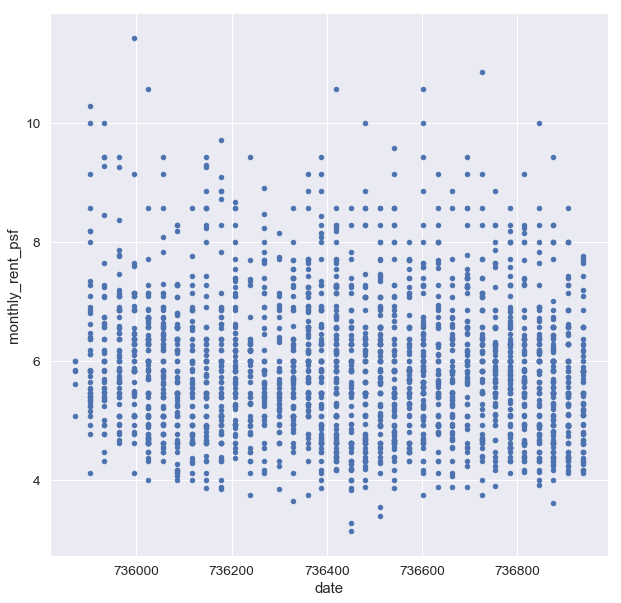

In [125]:
bedroom_1[(bedroom_1.district>1.9)&(bedroom_1.district<2.1)].plot(x='date',y=('monthly_rent_psf'),figsize=(10,10),kind='scatter')

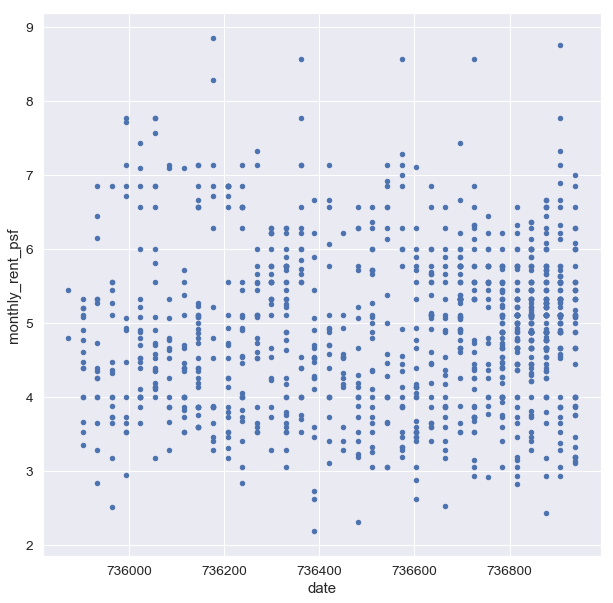

In [132]:
bedroom_1[(bedroom_1.district>2.9)&(bedroom_1.district<3.1)].plot(x='date',y=('monthly_rent_psf'),figsize=(10,10),kind='scatter')

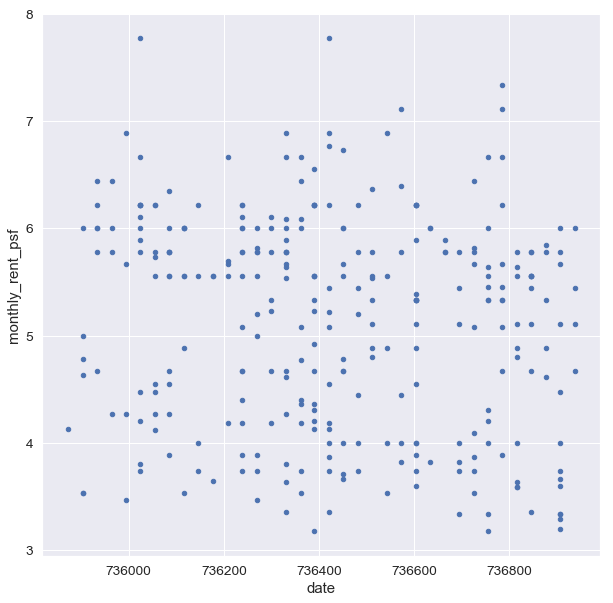

In [127]:
bedroom_1[(bedroom_1.district>3.9)&(bedroom_1.district<4.1)].plot(x='date',y=('monthly_rent_psf'),figsize=(10,10),kind='scatter')

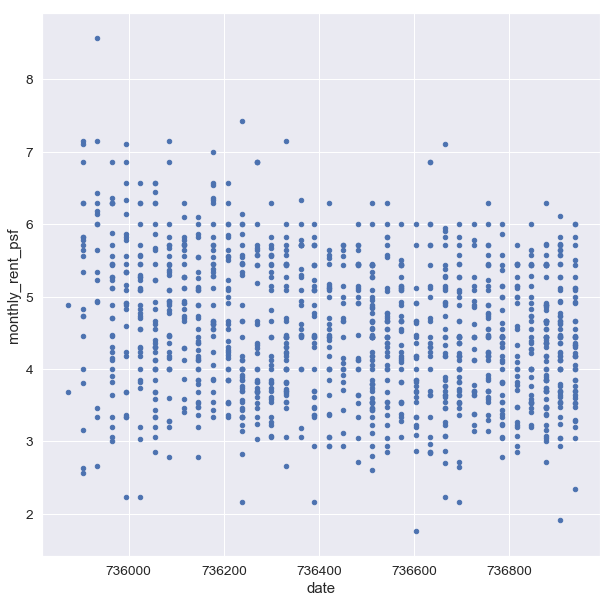

In [134]:
bedroom_1[(bedroom_1.district>4.9)&(bedroom_1.district<5.1)].plot(x='date',y=('monthly_rent_psf'),figsize=(10,10),kind='scatter')
